In [1]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from io import StringIO

from distil_utils import DISTILBERTmodelTrain

In [2]:


model = DISTILBERTmodelTrain(output_dir="/home/cibin/Desktop/exl/TD/models/transformers/model_batch1_distilbert",
                       labels=['O',"Authentication"])

Loading pretrained model...


You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.
Some weights of BertForTokenClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.token_type_embeddings.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.den


Pretrained model loaded.  Time taken is %f seconds... 2.34


In [3]:
model.load_saved_model()


---Loading model...
---Model loaded. Time taken is %f seconds... 0.51


In [7]:
data_path = '/home/cibin/Desktop/exl/TD/data/DS_v1/annotated/docanno_output/batch1/batch1_247/processed/final'


In [8]:

model.args.data_dir = data_path

In [9]:
train_actual, train_predictions = model._predict_on_file(os.path.join(data_path, 'train.txt'))

file_path :  /home/cibin/Desktop/exl/TD/data/DS_v1/annotated/docanno_output/batch1/batch1_247/processed/final/train.txt
mode :  train


Evaluating: 100%|███████████████████████████████| 25/25 [00:08<00:00,  2.89it/s]

3
results :  {'loss': 0.054232722967863085, 'precision': 0.27069351230425054, 'recall': 0.6302083333333334, 'f1': 0.378716744913928}
results :  {'loss': 0.054232722967863085, 'precision': 0.27069351230425054, 'recall': 0.6302083333333334, 'f1': 0.378716744913928}



/home/cibin/virtual_envs/nlp_env/lib/python3.11/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Authentication seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))


In [10]:
test_actual, test_predictions = model._predict_on_file(os.path.join(data_path, 'test.txt'))

file_path :  /home/cibin/Desktop/exl/TD/data/DS_v1/annotated/docanno_output/batch1/batch1_247/processed/final/test.txt
mode :  test


Evaluating: 100%|█████████████████████████████████| 7/7 [00:02<00:00,  3.37it/s]

3
results :  {'loss': 0.1978007054754666, 'precision': 0.049019607843137254, 'recall': 0.2127659574468085, 'f1': 0.07968127490039839}
results :  {'loss': 0.1978007054754666, 'precision': 0.049019607843137254, 'recall': 0.2127659574468085, 'f1': 0.07968127490039839}


In [11]:
labels = ['O', 'Authentication']

def evaluate(df):

    cm = confusion_matrix(df['actual_label'], df['prediction'], labels=labels)
    # print(cm)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Prediction')
    plt.ylabel("Actual")
    plt.title("Confusion matrix")
    plt.tight_layout()
    plt.show()
    
    precisions = precision_score(df['actual_label'], df['prediction'], labels=labels, average=None)
    recalls = recall_score(df['actual_label'], df['prediction'], labels=labels, average=None)
    
    for i, label in enumerate(labels):
        print("\n-----------------\n")

        print("label : ",label)
        print("precision : ",precisions[i])
        print("recall : ",recalls[i])
            
# evaluate(pred_df)

In [12]:
test_df = pd.read_csv(StringIO(test_actual), sep=' ', header = None)
test_df.columns = ['token','actual_label']

test_pred_df = pd.read_csv(StringIO(test_predictions), sep=' ', header = None)
test_pred_df.columns = ['token','prediction']

test_df['prediction'] = test_pred_df['prediction']
test_df

,token,actual_label,prediction
0,Agent:,O,O
1,Maple,O,O
2,Bank's,O,O
3,Retirement,O,O
4,"Planning,",O,O
...,...,...,...
6679,scam.,O,O
6680,Customer:,O,O
6681,Good,O,O
6682,to,O,Authentication


In [13]:
train_df = pd.read_csv(StringIO(train_actual), sep=' ', header = None)
train_df.columns = ['token','actual_label']

train_pred_df = pd.read_csv(StringIO(train_predictions), sep=' ', header = None)
train_pred_df.columns = ['token','prediction']

train_df['prediction'] = train_pred_df['prediction']
train_df

,token,actual_label,prediction
0,Agent:,O,O
1,Good,O,O
2,morning!,O,O
3,This,O,O
4,is,O,O
...,...,...,...
27429,is,O,O
27430,now,O,O
27431,active.,O,O
27432,Customer:,O,O


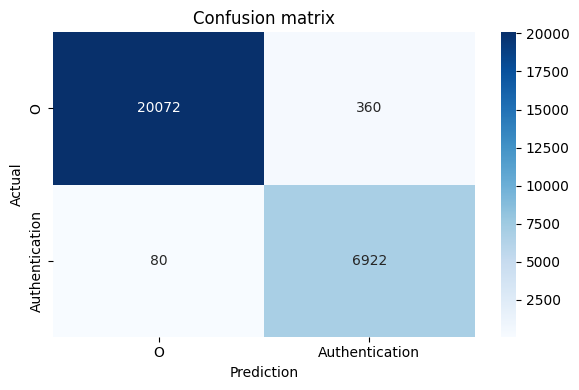


-----------------

label :  O
precision :  0.9960301707026598
recall :  0.9823805794831637

-----------------

label :  Authentication
precision :  0.9505630321340292
recall :  0.9885746929448729


In [14]:
evaluate(train_df[train_df.prediction.isna()==False])

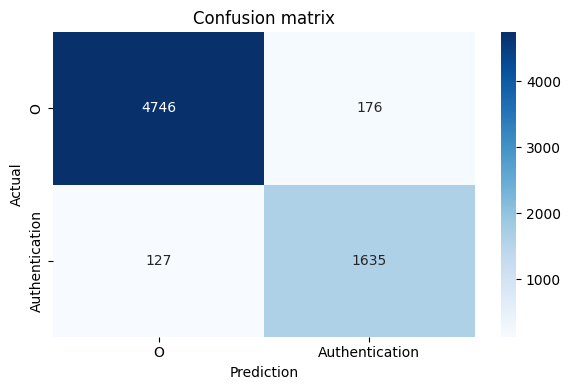


-----------------

label :  O
precision :  0.9739380258567617
recall :  0.9642421779764323

-----------------

label :  Authentication
precision :  0.9028161236885699
recall :  0.9279228149829739


In [15]:
evaluate(test_df)

In [18]:
dir(model.model.)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_auto_class',
 '_autoset_attn_implementation',
 '_backward_compatibility_gradient_checkpointing',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_check_and_enable_flash_attn_2',
 '_check_and_enable_sdpa',
 '_compiled_call_impl',
 '_convert_head_mask_to_5d',
 '_copy_lm_head_original_to_resized',
 '_create_repo',
 '_dispatch_accelerate_model',
 '_expand_inputs_for_generation',
 '_extract_past_from_model_output',
 '_forward_hooks',
 '_forward_hooks_always_called',
 '_forward_hooks_with_k

In [5]:
model.model.num_parameters()

107721218

In [6]:
model.args.device

device(type='cuda')